In [1]:
import warnings
from math import sqrt
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

data="data/"

In [21]:
present_data=pd.read_csv(data+"present_data.csv",parse_dates=True)

In [25]:
present_data.index=present_data["Date"]

In [51]:
Gold = present_data[["Gold"]]
#dex=Gold["Date"]
#Gold=Gold.drop("Date",axis=1)
Gold.index=pd.DatetimeIndex(Gold.index).strftime("%Y")
Gold.index=Gold.index.astype("Int32")
Gold

,Gold
Date,
2003,402.700012
2003,403.700012
2003,403.899994
2003,403.299988
2003,406.399994
...,...
2019,1478.199951
2019,1474.699951
2019,1482.500000


In [53]:

inflation = pd.read_csv(data+'world_inflation_annual_rate_dataset.csv')
inflation.index=inflation["year"].astype("Int32")
inflation=inflation.drop("year",axis=1)


In [56]:
pd.merge(Gold,inflation, how='inner', left_on=Gold.index, right_on=inflation.index)

,key_0,Gold,enflasyon oranı (yıllık %)
0,2003,402.700012,3.031967
1,2003,403.700012,3.031967
2,2003,403.899994,3.031967
3,2003,403.299988,3.031967
4,2003,406.399994,3.031967
...,...,...,...
3023,2019,1478.199951,2.206073
3024,2019,1474.699951,2.206073
3025,2019,1482.500000,2.206073
3026,2019,1513.800049,2.206073


In [65]:
present_data["year"]=pd.DatetimeIndex(present_data.index).strftime("%Y").astype("Int32")
present_data

,Date,S&P500,Dow Jones,NASDAQ,Russel 2000,VIX Volatility,DAX Index,Shenzhen Component Index,Nikkei 225,Hang Seng Index,Crude Oil,Silver,USD-CNY,USD-EUR,USD-JPY,USD-HKD,Dollar Index,Gold,year
Date,,,,,,,,,,,,,,,,,,,
2003-12-01,2003-12-01,1070.119995,9899.049805,1989.819946,554.590027,16.770000,4572.071145,404.457302,95.294217,1604.248609,29.950001,5.445000,8.267201,0.83577,109.169998,7.76500,90.430000,402.700012,2003
2003-12-02,2003-12-02,1066.619995,9853.639648,1980.069946,553.599976,16.270000,4605.004872,403.564632,95.743126,1599.637941,30.780001,5.496000,8.267201,0.82720,108.730003,7.75940,89.669998,403.700012,2003
2003-12-03,2003-12-03,1064.729980,9873.419922,1960.250000,545.190002,16.629999,4698.452979,406.144810,95.349856,1592.853458,31.100000,5.468000,8.267100,0.82488,108.300003,7.76040,89.570000,403.899994,2003
2003-12-04,2003-12-04,1069.719971,9930.820312,1968.800049,544.150024,16.299999,4681.099247,407.707746,96.333154,1589.257442,31.260000,5.452000,8.267000,0.82775,108.269997,7.76630,89.629997,403.299988,2003
2003-12-05,2003-12-05,1061.500000,9862.679688,1937.819946,539.010010,17.090000,4681.896125,405.615153,96.389702,1587.011193,30.730000,5.472000,8.266900,0.82055,107.620003,7.75970,89.190002,406.399994,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-19,2019-12-19,3205.370117,28376.960938,8887.219727,1667.089966,12.500000,14686.319862,1470.058504,217.842366,3569.611468,61.220001,17.058001,7.004000,0.89961,109.551003,7.78810,96.955002,1478.199951,2019
2019-12-20,2019-12-20,3221.219971,28455.089844,8924.959961,1671.900024,12.510000,14818.536005,1459.396010,217.736121,3575.817105,60.439999,17.128000,7.009400,0.89880,109.383003,7.79440,97.274002,1474.699951,2019
2019-12-23,2019-12-23,3224.010010,28551.529297,8945.650391,1674.140015,12.610000,14737.274863,1435.432548,217.546363,3579.190240,60.520000,17.403000,7.005700,0.90254,109.499001,7.79685,97.235001,1482.500000,2019


In [66]:
present_data=pd.merge(present_data,inflation, how='inner', left_on=present_data["year"], right_on=inflation.index)

In [67]:
present_data=present_data.drop("year",axis=1)
present_data=present_data.rename(columns={"key_0" : "year"})
present_data

,year,Date,S&P500,Dow Jones,NASDAQ,Russel 2000,VIX Volatility,DAX Index,Shenzhen Component Index,Nikkei 225,Hang Seng Index,Crude Oil,Silver,USD-CNY,USD-EUR,USD-JPY,USD-HKD,Dollar Index,Gold,enflasyon oranı (yıllık %)
0,2003,2003-12-01,1070.119995,9899.049805,1989.819946,554.590027,16.770000,4572.071145,404.457302,95.294217,1604.248609,29.950001,5.445000,8.267201,0.83577,109.169998,7.76500,90.430000,402.700012,3.031967
1,2003,2003-12-02,1066.619995,9853.639648,1980.069946,553.599976,16.270000,4605.004872,403.564632,95.743126,1599.637941,30.780001,5.496000,8.267201,0.82720,108.730003,7.75940,89.669998,403.700012,3.031967
2,2003,2003-12-03,1064.729980,9873.419922,1960.250000,545.190002,16.629999,4698.452979,406.144810,95.349856,1592.853458,31.100000,5.468000,8.267100,0.82488,108.300003,7.76040,89.570000,403.899994,3.031967
3,2003,2003-12-04,1069.719971,9930.820312,1968.800049,544.150024,16.299999,4681.099247,407.707746,96.333154,1589.257442,31.260000,5.452000,8.267000,0.82775,108.269997,7.76630,89.629997,403.299988,3.031967
4,2003,2003-12-05,1061.500000,9862.679688,1937.819946,539.010010,17.090000,4681.896125,405.615153,96.389702,1587.011193,30.730000,5.472000,8.266900,0.82055,107.620003,7.75970,89.190002,406.399994,3.031967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3023,2019,2019-12-19,3205.370117,28376.960938,8887.219727,1667.089966,12.500000,14686.319862,1470.058504,217.842366,3569.611468,61.220001,17.058001,7.004000,0.89961,109.551003,7.78810,96.955002,1478.199951,2.206073
3024,2019,2019-12-20,3221.219971,28455.089844,8924.959961,1671.900024,12.510000,14818.536005,1459.396010,217.736121,3575.817105,60.439999,17.128000,7.009400,0.89880,109.383003,7.79440,97.274002,1474.699951,2.206073
3025,2019,2019-12-23,3224.010010,28551.529297,8945.650391,1674.140015,12.610000,14737.274863,1435.432548,217.546363,3579.190240,60.520000,17.403000,7.005700,0.90254,109.499001,7.79685,97.235001,1482.500000,2.206073
3026,2019,2019-12-27,3240.020020,28645.259766,9006.620117,1669.030029,13.430000,14805.686330,1462.740192,217.612612,3624.265852,61.720001,17.849001,6.996300,0.90081,109.542000,7.78790,96.545998,1513.800049,2.206073


In [100]:
adjusted=pd.DataFrame()

def inflate(x,inflation):
    return x + (x*(inflation/100))
for column in present_data.columns[2:19]:
    adjusted[column+"_Adj"]=present_data.apply(lambda row: inflate(row[column],row['enflasyon oranı (yıllık %)']) ,axis=1)



In [102]:
present_data

,year,Date,S&P500,Dow Jones,NASDAQ,Russel 2000,VIX Volatility,DAX Index,Shenzhen Component Index,Nikkei 225,Hang Seng Index,Crude Oil,Silver,USD-CNY,USD-EUR,USD-JPY,USD-HKD,Dollar Index,Gold,enflasyon oranı (yıllık %)
0,2003,2003-12-01,1070.119995,9899.049805,1989.819946,554.590027,16.770000,4572.071145,404.457302,95.294217,1604.248609,29.950001,5.445000,8.267201,0.83577,109.169998,7.76500,90.430000,402.700012,3.031967
1,2003,2003-12-02,1066.619995,9853.639648,1980.069946,553.599976,16.270000,4605.004872,403.564632,95.743126,1599.637941,30.780001,5.496000,8.267201,0.82720,108.730003,7.75940,89.669998,403.700012,3.031967
2,2003,2003-12-03,1064.729980,9873.419922,1960.250000,545.190002,16.629999,4698.452979,406.144810,95.349856,1592.853458,31.100000,5.468000,8.267100,0.82488,108.300003,7.76040,89.570000,403.899994,3.031967
3,2003,2003-12-04,1069.719971,9930.820312,1968.800049,544.150024,16.299999,4681.099247,407.707746,96.333154,1589.257442,31.260000,5.452000,8.267000,0.82775,108.269997,7.76630,89.629997,403.299988,3.031967
4,2003,2003-12-05,1061.500000,9862.679688,1937.819946,539.010010,17.090000,4681.896125,405.615153,96.389702,1587.011193,30.730000,5.472000,8.266900,0.82055,107.620003,7.75970,89.190002,406.399994,3.031967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3023,2019,2019-12-19,3205.370117,28376.960938,8887.219727,1667.089966,12.500000,14686.319862,1470.058504,217.842366,3569.611468,61.220001,17.058001,7.004000,0.89961,109.551003,7.78810,96.955002,1478.199951,2.206073
3024,2019,2019-12-20,3221.219971,28455.089844,8924.959961,1671.900024,12.510000,14818.536005,1459.396010,217.736121,3575.817105,60.439999,17.128000,7.009400,0.89880,109.383003,7.79440,97.274002,1474.699951,2.206073
3025,2019,2019-12-23,3224.010010,28551.529297,8945.650391,1674.140015,12.610000,14737.274863,1435.432548,217.546363,3579.190240,60.520000,17.403000,7.005700,0.90254,109.499001,7.79685,97.235001,1482.500000,2.206073
3026,2019,2019-12-27,3240.020020,28645.259766,9006.620117,1669.030029,13.430000,14805.686330,1462.740192,217.612612,3624.265852,61.720001,17.849001,6.996300,0.90081,109.542000,7.78790,96.545998,1513.800049,2.206073


In [101]:
adjusted

,S&P500_Adj,Dow Jones_Adj,NASDAQ_Adj,Russel 2000_Adj,VIX Volatility_Adj,DAX Index_Adj,Shenzhen Component Index_Adj,Nikkei 225_Adj,Hang Seng Index_Adj,Crude Oil_Adj,Silver_Adj,USD-CNY_Adj,USD-EUR_Adj,USD-JPY_Adj,USD-HKD_Adj,Dollar Index_Adj,Gold_Adj
0,1102.565678,10199.185711,2050.150627,571.405013,17.278461,4710.694826,416.720313,98.183506,1652.888895,30.858075,5.610091,8.517860,0.861110,112.479996,8.000432,93.171808,414.909743
1,1098.959560,10152.398734,2040.105010,570.384943,16.763301,4744.627093,415.800577,98.646026,1648.138433,31.713240,5.662637,8.517860,0.852280,112.026661,7.994662,92.388763,415.940063
2,1097.012240,10172.778739,2019.684130,561.719982,17.134215,4840.908515,418.458986,98.240832,1641.148247,32.042942,5.633788,8.517756,0.849890,111.583623,7.995693,92.285732,416.146108
3,1102.153525,10231.919490,2028.493413,560.648473,16.794210,4823.028624,420.069310,99.253943,1637.443200,32.207793,5.617303,8.517653,0.852847,111.552707,8.001772,92.347549,415.527910
4,1093.684328,10161.712864,1996.574004,555.352614,17.608163,4823.849663,417.913270,99.312205,1635.128846,31.661723,5.637909,8.517550,0.845429,110.883006,7.994971,91.894214,418.721907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3023,3276.082924,29002.977427,9083.278287,1703.867188,12.775759,15010.310808,1502.489069,222.648128,3648.359704,62.570559,17.434313,7.158514,0.919456,111.967778,7.959911,99.093900,1510.810122
3024,3292.282437,29082.829914,9121.851098,1708.783360,12.785980,15145.443736,1491.591352,222.539539,3654.702242,61.773349,17.505856,7.164032,0.918628,111.796072,7.966350,99.419938,1507.232909
3025,3295.134026,29181.396892,9142.997974,1711.072766,12.888185,15062.389913,1467.099239,222.345595,3658.149792,61.855116,17.786923,7.160251,0.922451,111.914628,7.968854,99.380076,1515.205033
3026,3311.497228,29277.195124,9205.312737,1705.850051,13.726276,15132.310587,1495.009310,222.413305,3704.219804,63.081590,18.242763,7.150644,0.920683,111.958576,7.959707,98.675873,1547.195584


In [103]:
adjusted.to_csv(data+"inf_adjusted_dataset.csv")

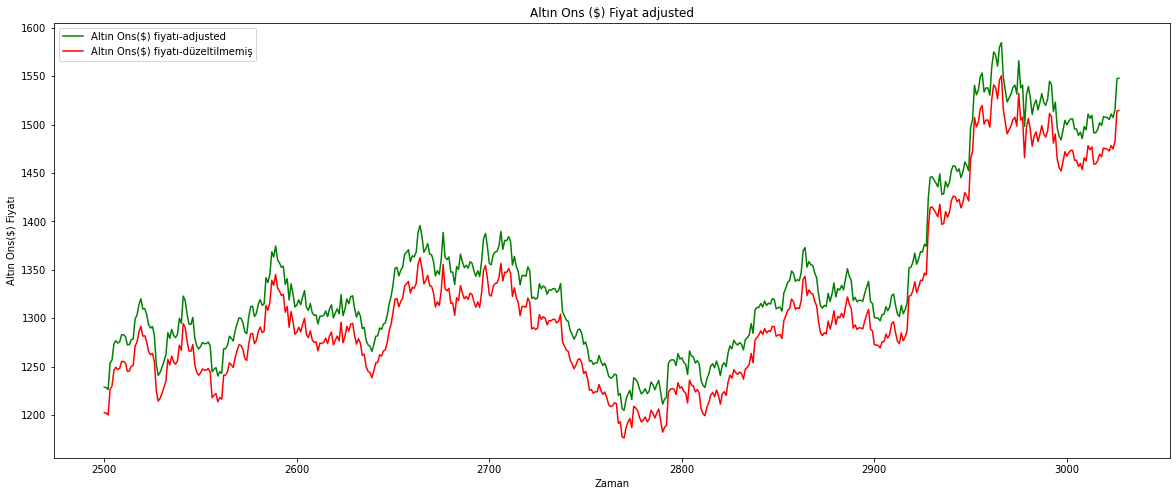

In [88]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
plt.plot(adjusted[2500:],color = 'green', label = 'Altın Ons($) fiyatı-adjusted')
plt.plot(present_data["Gold"][2500:],color = 'red', label = 'Altın Ons($) fiyatı-düzeltilmemiş')

plt.title('Altın Ons ($) Fiyat adjusted')
plt.xlabel('Zaman')
plt.ylabel('Altın Ons($) Fiyatı')
plt.legend()
plt.show()

In [ ]:

 
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	rmse = sqrt(mean_squared_error(test, predictions))
	return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					print(rmse)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
 

In [9]:
gold = pd.read_csv(data+'gold_dataset.csv', header=0, index_col=0, squeeze=True)["Close"]
gold=gold[0:int(len(gold)*0.1)]
gold

/tmp/ipykernel_29271/347674754.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  gold = pd.read_csv(data+'gold_dataset.csv', header=0, index_col=0, squeeze=True)["Close"]


Date
2000-08-30    273.899994
2000-08-31    278.299988
2000-09-01    277.000000
2000-09-05    275.799988
2000-09-06    274.200012
                 ...    
2002-08-06    305.500000
2002-08-07    314.299988
2002-08-08    310.399994
2002-08-09    314.200012
2002-08-12    314.100006
Name: Close, Length: 484, dtype: float64

In [11]:
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(gold.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=29.409
ARIMA(0, 0, 2) RMSE=10.620
ARIMA(0, 1, 0) RMSE=2.726
ARIMA(0, 1, 1) RMSE=2.726
ARIMA(0, 1, 2) RMSE=2.732
ARIMA(0, 2, 0) RMSE=3.949
ARIMA(0, 2, 1) RMSE=2.728
ARIMA(0, 2, 2) RMSE=2.728
ARIMA(1, 0, 0) RMSE=2.792
ARIMA(1, 0, 1) RMSE=2.788
ARIMA(1, 0, 2) RMSE=2.801
ARIMA(1, 1, 0) RMSE=2.727
ARIMA(1, 1, 1) RMSE=2.730
ARIMA(1, 1, 2) RMSE=2.727
ARIMA(1, 2, 0) RMSE=3.345
ARIMA(1, 2, 1) RMSE=2.728
ARIMA(1, 2, 2) RMSE=2.728
ARIMA(2, 0, 0) RMSE=2.787
ARIMA(2, 0, 1) RMSE=2.805
ARIMA(2, 0, 2) RMSE=2.797
ARIMA(2, 1, 0) RMSE=2.733
ARIMA(2, 1, 1) RMSE=2.729
ARIMA(2, 1, 2) RMSE=2.729
ARIMA(2, 2, 0) RMSE=3.012
ARIMA(2, 2, 1) RMSE=2.735
ARIMA(2, 2, 2) RMSE=2.731
ARIMA(4, 0, 0) RMSE=2.786
ARIMA(4, 0, 1) RMSE=2.791
ARIMA(4, 0, 2) RMSE=2.781
ARIMA(4, 1, 0) RMSE=2.735
ARIMA(4, 1, 1) RMSE=2.701
ARIMA(4, 1, 2) RMSE=2.703
ARIMA(4, 2, 0) RMSE=2.954
ARIMA(4, 2, 1) RMSE=2.735
ARIMA(4, 2, 2) RMSE=2.718
ARIMA(6, 0, 0) RMSE=2.785
